# Regresión Logistíca con SCIKIT-LEARN

## Regresíon Logística Ejercicio 1

Conociendo el dataset, el profesor "Freddy Michael Kruege Myres", no tiene claro que tiempo recomendarles a sus estudiantes para que estudien para el examen y con ello garantizar las mejores notas. Por lo tanto recolecta la base de datos con los útimos 2000 exámenes donde están las horas que estudiaron y si aprobó o no. 

En la variante de este ejercicio se presenta el caso de horas de tutoria para cada celda.
  
La base de datos esta disponible en:

[Horas de Estudio diario y Tutorías por mes vs Aprobación](https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/Databaset's/horas_estudio_tutorias_vs_aprobacion.csv)



### Importar Librerías y DATA

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.DataFrame()
data = pd.read_csv(
    "https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databaset's/horas_estudio_tutorias_vs_aprobacion.csv", 
    encoding='utf-8')

### Conocer la DATA

In [ ]:
data.info

<bound method DataFrame.info of      horas_autoestudio_diario  tutorias_mes  aprobo_perdio
0                           7            27              1
1                           2            43              0
2                           7            26              1
3                           8            29              1
4                           3            42              0
..                        ...           ...            ...
995                         6            22              1
996                         9            30              1
997                         3            39              0
998                         7            25              1
999                         5            37              0

[1000 rows x 3 columns]>

In [ ]:
data.describe()

,horas_autoestudio_diario,tutorias_mes,aprobo_perdio
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   horas_autoestudio_diario  1000 non-null   int64
 1   tutorias_mes              1000 non-null   int64
 2   aprobo_perdio             1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [ ]:
data.isnull().sum()

horas_autoestudio_diario    0
tutorias_mes                0
aprobo_perdio               0
dtype: int64

### Graficar la DATA

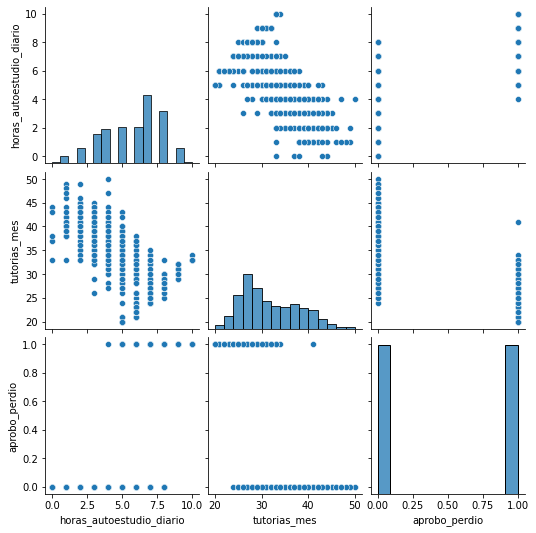

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

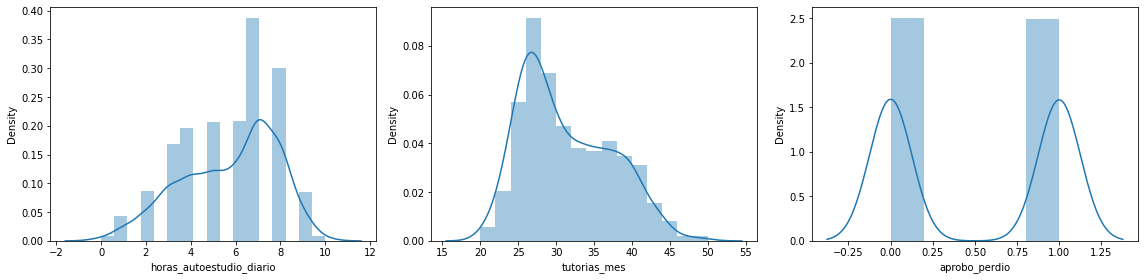

In [ ]:
cols = 3
fig, ax = plt.subplots(ncols=cols, figsize=(16,4))

col = data.columns
index = 0

for i in range(cols):
  sns.distplot(data[col[index]], ax=ax[i])
  index += 1

plt.tight_layout()

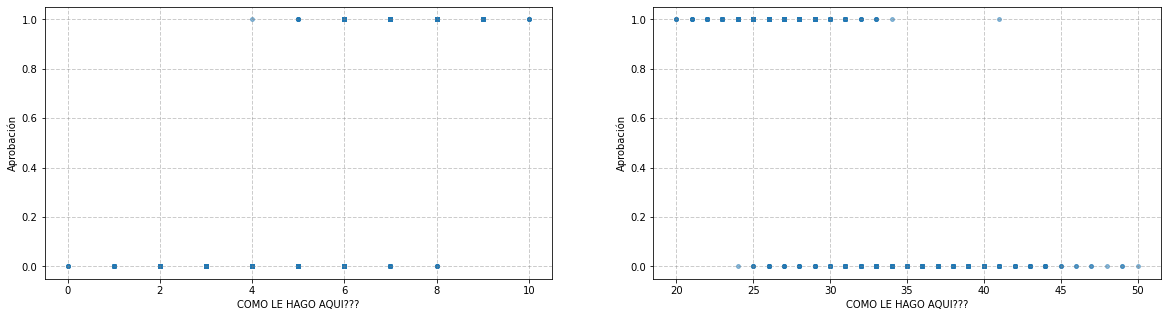

In [ ]:
col = data.columns
index = 0
plt.figure(figsize=(20,5))

for i in range(1,3):
  plt.subplot(1, 2, i)
  X = data[col[index]]
  y = data['aprobo_perdio']
  plt.scatter(X, y, s=15, alpha=0.5)
  plt.xlabel('COMO LE HAGO AQUI???')
  plt.ylabel('Aprobación')
  plt.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
  i += 1
  index += 1

### Preparación de la DATA

In [ ]:
X = data.drop('aprobo_perdio', axis=1)
y = data.aprobo_perdio

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.2)

### Entrenamiento de la DATA

In [ ]:
logistic_regression = LogisticRegression()

In [ ]:
logistic_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predecir

In [ ]:
y_prediction = logistic_regression.predict(x_test)
print(y_prediction)

[1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1
 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0
 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1]


### Probabilidades

In [ ]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Exactitud= ' + str(100*accuracy) + "%")

Exactitud= 97.0%


### Pruebas con datos manuales

La nueva predicción se hace con los siguientes datos:  

||Horas Estudio|Horas Tutorías|
|----|----|----|
|1-estudiante|4|38|
|2-estudiante|8|29|
|3-estudiante|1|1|
|4-estudiante|0|0|

In [ ]:
students = np.array([[4,38],[8,29],[1,1],[0,0]])
x_new = pd.DataFrame(students, columns=['horas_autoestudio_diario', 'tutorias_mes'])
y_prediction = logistic_regression.predict(x_new)
print(y_prediction)

[0 1 1 1]


## Regresión Logística Ejercicio 2

### Descripción del problema

El conjunto de datos fue tomado del repositorio UCI Machine Learning, con algunos cambios realizados en el repositorio de [Machine Learning, Luis Castellanos](https://github.com/luisFernandoCastellanosG/Machine_learning/blob/master/Databaset's/mercadeo_bancario.csv), y esta relacionado con campañas de marketing directo (llamadas telefónicas) de una institución bancaria portuguesa. El objetivo de clasificación es predecir si el cliente se subscribirá(1/0) a un depósito a plazo (variable y)

Las variables del dataset son las siguientes: 

- edad (numérica)
- trabajo: tipo de trabajo (categórico: "admin.”, "housemaid", "management", "retired", "self-employed", "student", "technician", "unemployed", "unknown")
- conyugal: estado civil (categórico: "divorciado", "casado", "único", "desconocido")
- educación (categórica: “preschool", “primary_school", “tecnical_school", " Technological_school", "illiterate", "professional.course", "university.degree", "unknown")
- Total_hijos: número total de hijos
- credito_sin_pago: ¿tiene crédito en incumplimiento de pago? (categóricamente: "no", "sí", "desconocido")
- prestamo_vivienda: ¿tiene préstamo de vivienda? (categóricamente: "no", "sí", "desconocido")
- prestamo_personal: ¿tiene préstamo personal? (categóricamente: "no", "sí", "desconocido")
- valor_préstamo:(numérico) es el valor total del prestamos que tiene con el banco
- tarjetas_credito: Número de tarjetas de crédito con otros bancos
- contacto: tipo de comunicación de contacto (categórico: "celular", "teléfono")
- mes: último mes de contacto del año (categórico: "jan", "feb", "mar", ..., "nov", "dec")
- dia_semana: último día de contacto de la semana (categórico: "mon", "tue", "wed", "thu", "fri")
- duracion_ultimo_contacto: duración del último contacto, en segundos (numérico). Nota importante: este atributo afecta en gran medida al destino de salida (p. ej., si
duration-0 y 'no').
- campanna: número de contactos realizados durante esta campaña y para este cliente (numérico, incluye el último contacto)
- dias_ultimo_contacto: número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior
- anterior_contacto: número de contactos realizados antes de esta campaña y para este cliente (numérico)
- resultado_anterior: resultado de la campaña de marketing anterior (categórica: "fracaso", "inexistente", "éxito")
- numero_empleados: número de empleados que tiene a su cargo — (numérico)
- Predecir variable (objetivo deseado): (binario: "1", significa "Sí", "0" significa "No")

### Importar librerías y data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
data = pd.DataFrame()
data = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databaset's/mercadeo_bancario.csv", 
                   encoding='utf-8')

### Conocer la data

In [3]:
data.describe()

,edad,total_hijos,valor_prestamo,dias_ultimo_pago,tarjetas_credito,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.984680,149706.676751,0.336409,2.497524,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,2.583405,166028.840792,4.478984,1.703683,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,2.000000,0.000000,0.000000,1.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,4.000000,81778.500000,0.000000,2.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,6.000000,290938.500000,0.000000,4.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,8.000000,499992.000000,90.000000,5.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


In [4]:
data.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

In [5]:
data.head(20)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1
5,30,management,divorced,preschool,6,yes,yes,no,499476,75,1,cellular,jul,tue,68,90,0,1553,0
6,37,blue-collar,married,preschool,6,no,yes,no,86520,0,5,cellular,may,thu,204,66,0,442,0
7,39,blue-collar,divorced,tecnical_school,4,no,yes,no,176081,0,1,cellular,may,fri,191,51,0,495,0
8,36,admin.,married,university.degree,6,no,no,no,0,0,3,cellular,jun,mon,174,0,1,1097,1
9,27,blue-collar,single,preschool,3,no,yes,no,323709,0,1,cellular,apr,thu,191,33,1,414,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      41188 non-null  int64 
 1   trabajo                   41188 non-null  object
 2   estado_civil              41188 non-null  object
 3   educacion                 41188 non-null  object
 4   total_hijos               41188 non-null  int64 
 5   credito_sin_pago          41188 non-null  object
 6   prestamo_vivienda         41188 non-null  object
 7   prestamo_personal         41188 non-null  object
 8   valor_prestamo            41188 non-null  int64 
 9   dias_ultimo_pago          41188 non-null  int64 
 10  tarjetas_credito          41188 non-null  int64 
 11  contacto                  41188 non-null  object
 12  mes                       41188 non-null  object
 13  dia_semana                41188 non-null  object
 14  duracion_ultimo_contac

### Convertir Data Categorica en Data Numerica

In [7]:
trabajo = {
    'unknown': 0,
    'admin.': 1, 
    'housemaid': 2, 
    'management': 3, 
    'retired': 4, 
    'self-employed': 5, 
    'student': 6, 
    'technician': 7, 
    'unemployed': 8,
    'blue-collar': 9,
    'services': 10,
    'entrepreneur': 11
    }
data['trabajo'] = data['trabajo'].map(trabajo)

In [8]:
estado_civil = {
    'unknown': 0,
    'single': 1,
    'married': 2,
    'divorced' : 3
    }
data['estado_civil '] = data['estado_civil '].map(estado_civil)

In [9]:
educacion = {
    'unknown': 0,
    'preschool': 1,
    'primary_school': 2,
    'tecnical_school': 3,
    'Technological_school': 4,
    'illiterate': 5,
    'professional.course': 6,
    'university.degree': 7
}
data['educacion'] = data['educacion'].map(educacion)

In [10]:
credito_sin_pago = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['credito_sin_pago'] = data['credito_sin_pago'].map(credito_sin_pago)

In [11]:
prestamo_vivienda = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['prestamo_vivienda'] = data['prestamo_vivienda'].map(prestamo_vivienda)

In [12]:
prestamo_personal = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}
data['prestamo_personal'] = data['prestamo_personal'].map(prestamo_personal)

In [13]:
contacto = {
    'cellular': 1,
    'telephone': 2,
}
data['contacto'] = data['contacto'].map(contacto)

In [14]:
mes = {
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11
}
data['mes'] = data['mes'].map(mes)

In [15]:
dia_semana = {
    'sun': 1,
    'mon': 2,
    'tue': 3,
    'wed': 4,
    'thu': 5,
    'fri': 6,
    'sat': 7
}
data['dia_semana'] = data['dia_semana'].map(dia_semana)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      41188 non-null  int64  
 1   trabajo                   41188 non-null  int64  
 2   estado_civil              41188 non-null  int64  
 3   educacion                 41188 non-null  int64  
 4   total_hijos               41188 non-null  int64  
 5   credito_sin_pago          41188 non-null  int64  
 6   prestamo_vivienda         41188 non-null  int64  
 7   prestamo_personal         41188 non-null  int64  
 8   valor_prestamo            41188 non-null  int64  
 9   dias_ultimo_pago          41188 non-null  int64  
 10  tarjetas_credito          41188 non-null  int64  
 11  contacto                  41188 non-null  int64  
 12  mes                       41006 non-null  float64
 13  dia_semana                41188 non-null  int64  
 14  duraci

In [17]:
data = data.fillna(0)

In [18]:
data['mes'] = data['mes'].astype('int')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edad                      41188 non-null  int64
 1   trabajo                   41188 non-null  int64
 2   estado_civil              41188 non-null  int64
 3   educacion                 41188 non-null  int64
 4   total_hijos               41188 non-null  int64
 5   credito_sin_pago          41188 non-null  int64
 6   prestamo_vivienda         41188 non-null  int64
 7   prestamo_personal         41188 non-null  int64
 8   valor_prestamo            41188 non-null  int64
 9   dias_ultimo_pago          41188 non-null  int64
 10  tarjetas_credito          41188 non-null  int64
 11  contacto                  41188 non-null  int64
 12  mes                       41188 non-null  int64
 13  dia_semana                41188 non-null  int64
 14  duracion_ultimo_contacto  41188 non-nu

### Graficar la Data

In [20]:
data.describe()

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.00000,41188.000000,41188.000000,41188.000000
mean,40.02406,5.702001,1.827231,4.410969,3.984680,0.421336,0.571914,0.199767,149706.676751,0.336409,2.497524,1.365252,6.554870,3.979581,258.285010,26.35117,0.172963,1002.421652,0.112654
std,10.42125,3.533820,0.608902,2.225748,2.583405,0.811128,0.541209,0.456002,166028.840792,4.478984,1.703683,0.481507,2.056047,1.411514,259.279249,29.94257,0.494901,577.707188,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,3.000000,102.000000,0.00000,0.000000,504.000000,0.000000
50%,38.00000,7.000000,2.000000,4.000000,4.000000,0.000000,1.000000,0.000000,81778.500000,0.000000,2.000000,1.000000,6.000000,4.000000,180.000000,13.00000,0.000000,1001.000000,0.000000
75%,47.00000,9.000000,2.000000,7.000000,6.000000,0.000000,1.000000,0.000000,290938.500000,0.000000,4.000000,2.000000,8.000000,5.000000,319.000000,52.00000,0.000000,1506.000000,0.000000
max,98.00000,11.000000,3.000000,7.000000,8.000000,2.000000,2.000000,2.000000,499992.000000,90.000000,5.000000,2.000000,11.000000,6.000000,4918.000000,90.00000,7.000000,2000.000000,1.000000


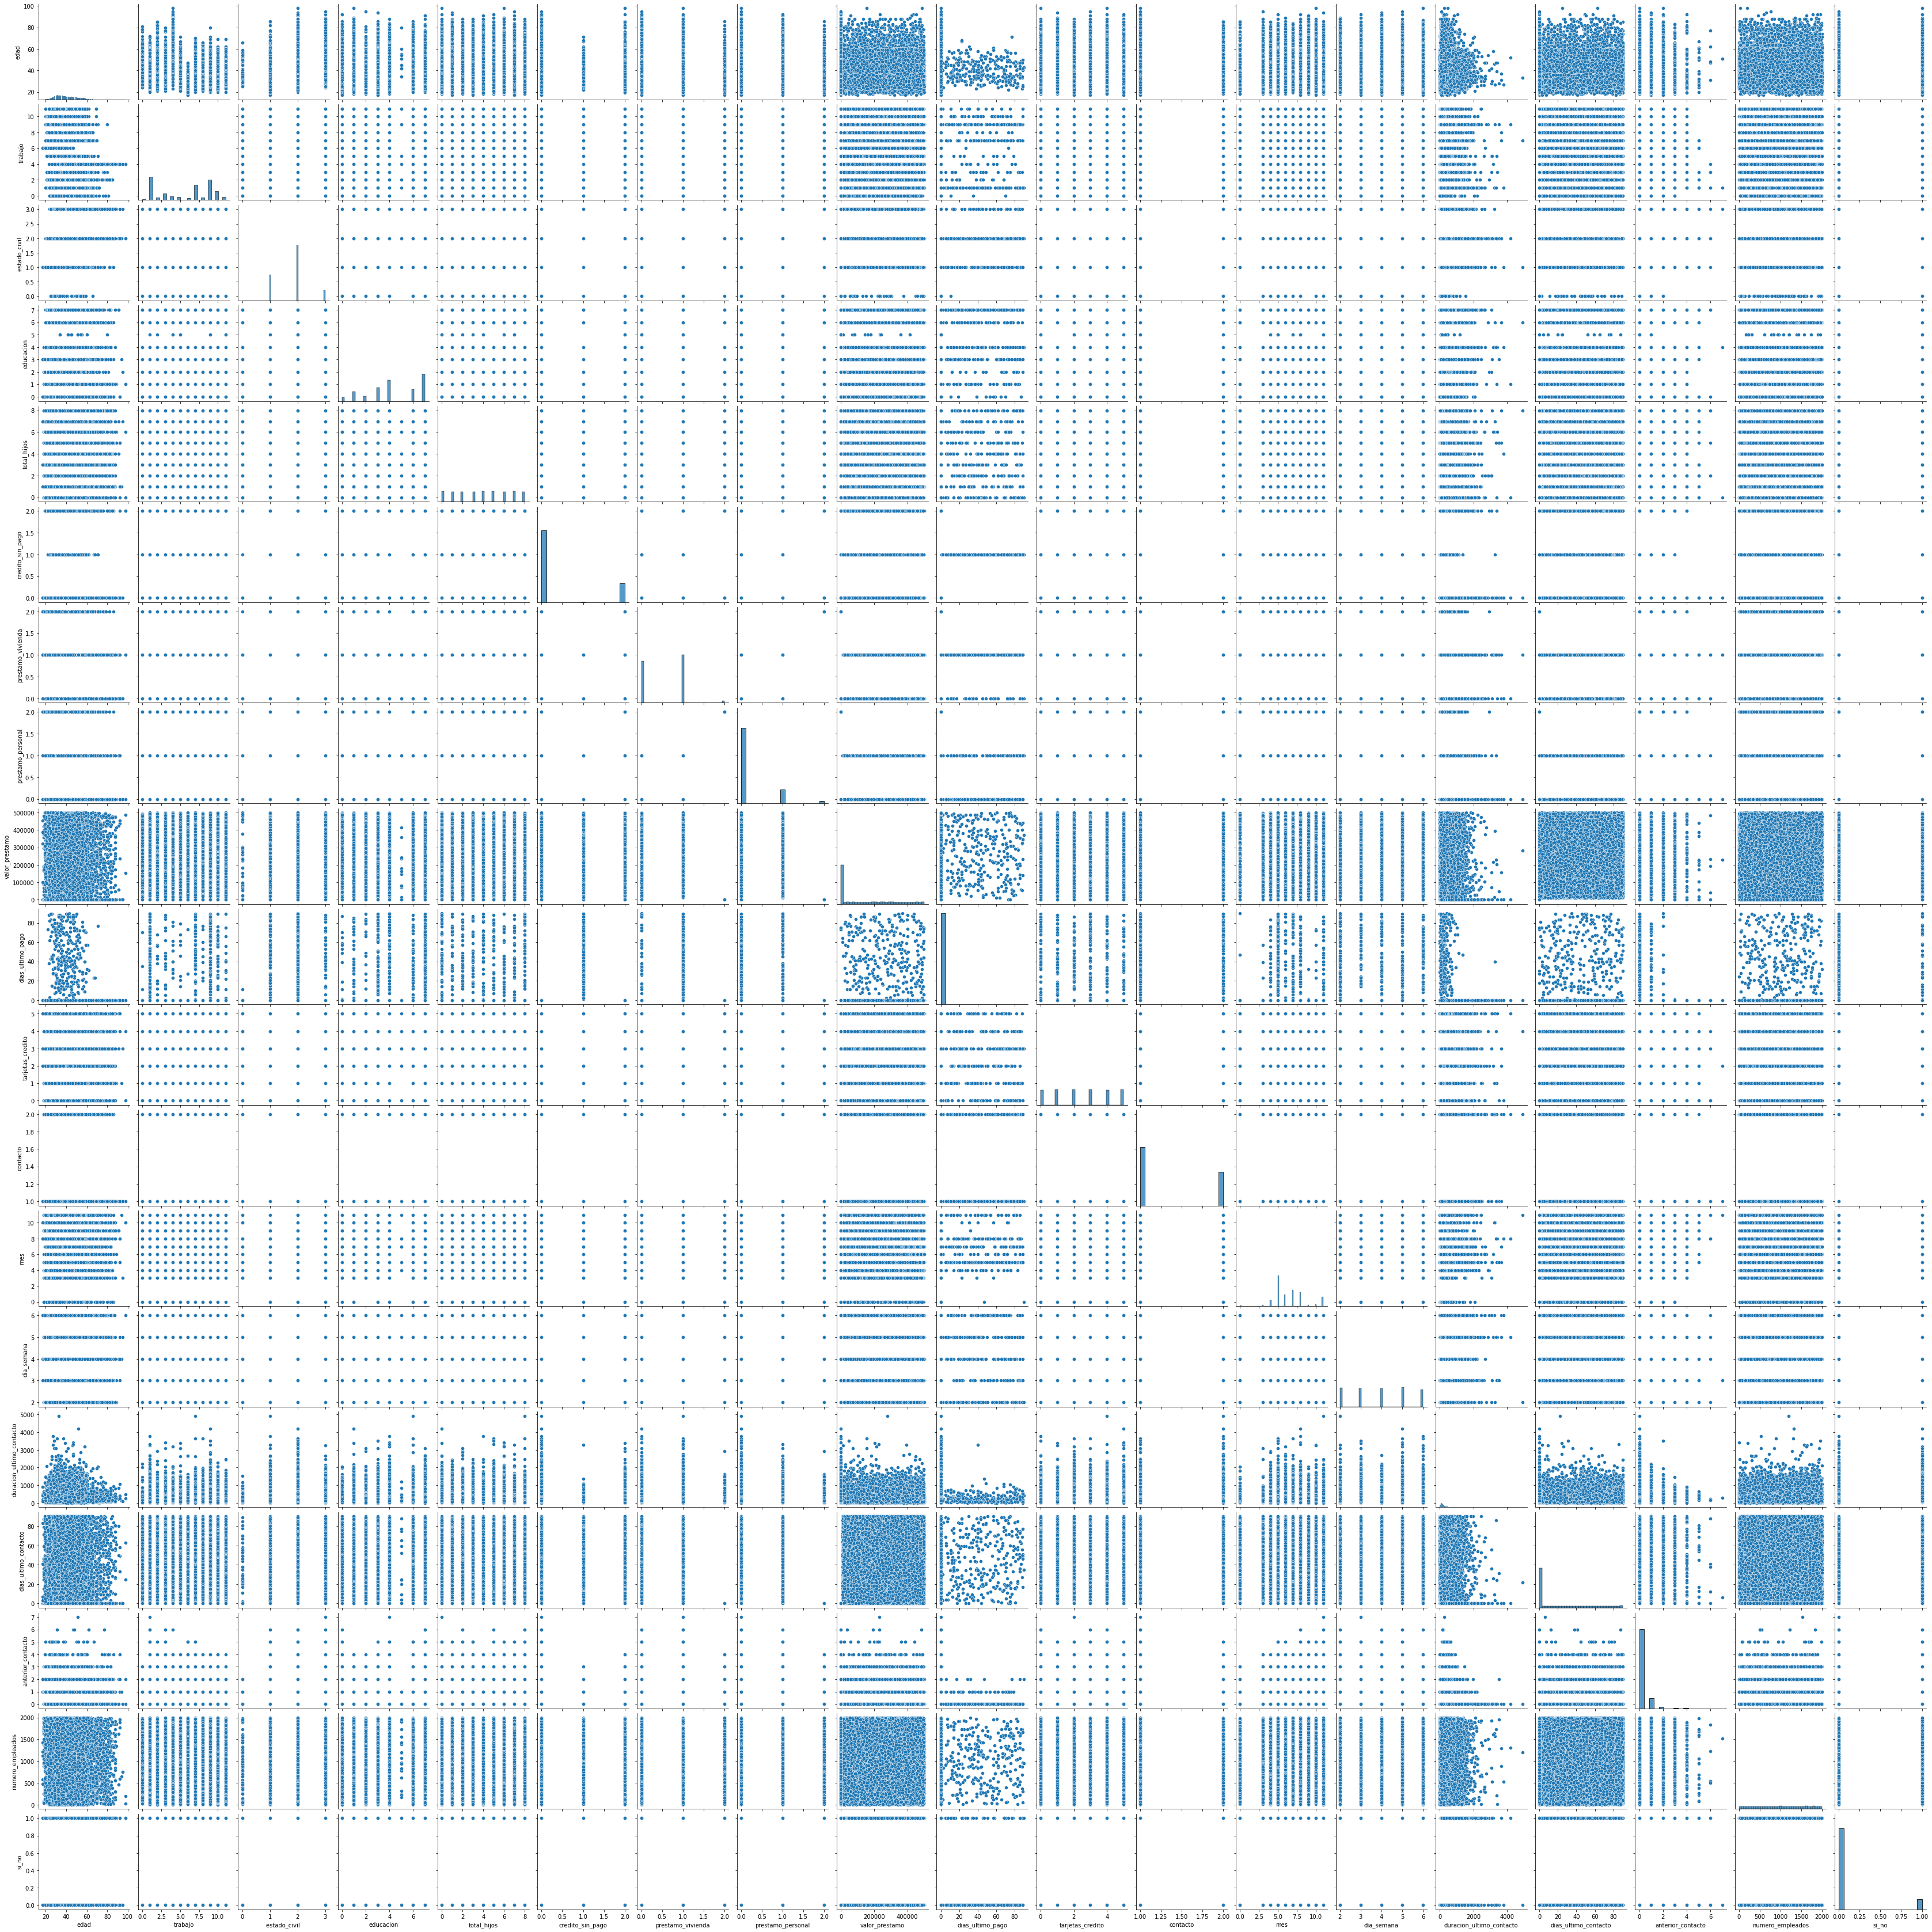

In [21]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

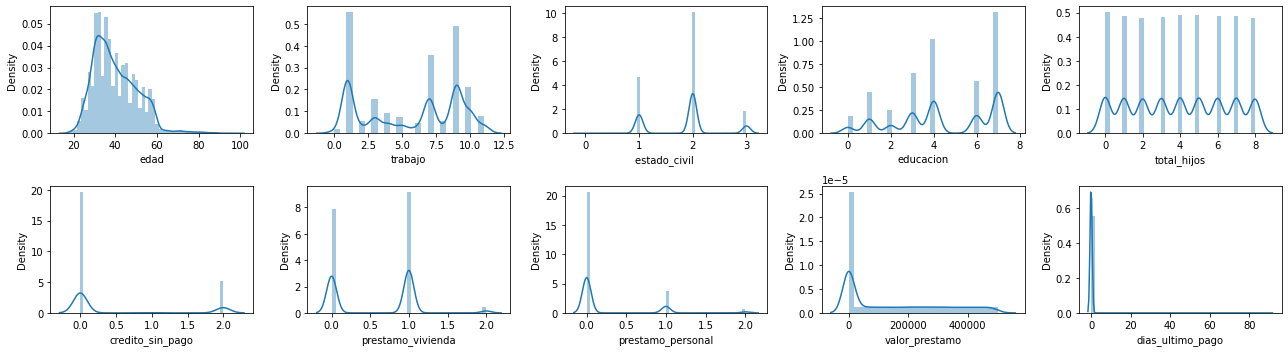

In [22]:
rows = 2
cols = 5

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18,5))

col = data.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot(data[col[index]], ax=ax[i][j])
    index += 1

plt.tight_layout()

### Responder algunas preguntas

Edad Promedio de los que dijeron SI

In [25]:
data[data['si_no']==1]['edad'].mean()

40.91314655172414

Edad Promedio de los que dijeron NO

In [26]:
data[data['si_no']==0]['edad'].mean()

39.911185290576775

Promedio de Hijos

In [28]:
data['total_hijos'].mean()

3.9846800038846264

Cantidad de personas según su estado Civil

In [29]:
data['estado_civil '].value_counts()

2    24928
1    11568
3     4612
0       80
Name: estado_civil , dtype: int64

Cantida de personas según su trabajo

In [30]:
data['educacion'].value_counts()

7    12168
4     9515
3     6045
6     5243
1     4176
2     2292
0     1731
5       18
Name: educacion, dtype: int64

### Construir el modelo de Regresión Logística

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [31]:
X = data.drop('si_no', axis=1)
y = data.si_no

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [32]:
x_train.shape

(32950, 18)

In [35]:
logistic_regression = LogisticRegression()

In [36]:
logistic_regression.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_prediction = logistic_regression.predict(x_test)
print(y_prediction)

[0 0 1 ... 0 0 0]


In [38]:
accuracy = metrics.accuracy_score(y_test, y_prediction)
print('Exactitud= ' + str(100*accuracy) + "%")

Exactitud= 88.73512988589464%


In [48]:
logistic_regression.score(x_test, y_test)

0.8873512988589464

### Predicciones Manuales

Predecir la respuesta de las siguientes personas con las caracteristicas:

||Edad|Trabajo|Estado Civil|Educacion|Total hijos|Credito_sin_pago|Prestamo vivienda|Prestamo personal|Valor prestamo|Dias ultimo pago|Tarjetas credito|Contacto|Mes|Día semana|Duración último contacto|Días último contacto|Anterior contacto|numero_empleados|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|persona-1|20|unemployed|single|tecnical school|0|yes|no|yes|2000|3|0|1|april|monday|280 sg|15|2|0|

In [47]:
personas = np.array([[20,8,1,3,0,1,0,1,2000,3,0,1,4,2,280,15,2,0]])
x_new = pd.DataFrame(personas, columns=['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados'])
y_prediction = logistic_regression.predict(x_new)
print(y_prediction)

[0]


### Recursive Feature Elimination (RFE)

In [50]:
from sklearn.feature_selection import RFE

In [60]:
model = LogisticRegression(solver='lbfgs', max_iter=42000)
rfe = RFE(model, 5, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


In [62]:
rfe.support_

array([False, False,  True, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False,  True, False])

In [63]:
X.head(1)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados
0,44,9,2,1,7,2,1,0,268017,0,5,1,8,5,210,43,0,88


In [64]:
XX = X[X.columns[rfe.support_]]
XX.head(1)

,estado_civil,credito_sin_pago,contacto,mes,anterior_contacto
0,2,2,1,8,0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=8, stratify=y)

In [66]:
X_train.shape

(32950, 5)

In [67]:
model = LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [68]:
model.score(X_test, y_test)

0.8883224083515416